In [6]:
import math
import queue as Q
import matplotlib.pyplot as plt
import numpy as np
import time
import random
import pdb
import string
from MST import MST,City

In [7]:
# Heuristics

# calculating heuristic or not or calculating cost or not depending on h_mode and s_mode (heuristic type and search type)
def cost_fn(graph, path,source, next_city, s, prev_g_cost, h_mode, s_mode):
    g_cost=0
    if(s_mode!=1):
        g_cost = prev_g_cost + h1_straight_line(graph[path[-1]], graph[next_city])

    h_cost=0
    if(s_mode!=2):
        new_path=None
        not_visited=None

        if h_mode == 1:
            h_cost = h1_straight_line(graph[next_city], s)
        else:
            new_path = path[:]
            new_path.append(next_city)
            not_visited = set(new_path).symmetric_difference(set(graph.keys()))

        if h_mode == 2:
            not_visited = list(not_visited)
            not_visited.append(source)
            h_cost = h2_mst(graph, path,source, next_city,not_visited)

        if h_mode == 3:
            h_cost = h3_next_min_distance(graph, path, next_city,not_visited)

    f = g_cost + h_cost
    return f, g_cost

# H2 mst heuristic fn 
def h2_mst( graph, path,source, next_city,not_visited):
    edges = []
    for i in range(len(not_visited)):
        for j in range(len(not_visited)):
            if j != i:
                src = not_visited[i]
                dest = not_visited[j]
                weight = h1_straight_line(graph[src], graph[dest]) 
                edges.append([src, dest, weight])

    mst_g = MST(not_visited)

    for src,dest,weight in edges:
        mst_g.add_edge(src, dest, weight)  

    return mst_g.get_mst_weight()
# H3 my heuristic fn next minimum distance
def h3_next_min_distance( graph, path, next_city,not_visited):
    if len(not_visited) == 0:
        return 0

    min_dist = 999999999999999
    for city in not_visited:
        dist = h1_straight_line(graph[path[-1]], graph[city])
        if (dist<min_dist):
            min_dist=dist  

    return min_dist

# H1 fn straight line heuristic
def h1_straight_line( c1, c2):
    return math.sqrt((c1.x - c2.x) ** 2 + (c1.y - c2.y) ** 2)

# Draw a map showing path from start city to goal city (same city)
def draw_route( g, path):
    coords=[]
    for point in path:
        coords.append([g[point].x,g[point].y])

    coords=np.array(coords)
    fig, graph = plt.subplots()
    graph.plot(coords[:,0], coords[:,1])
    for i, label in enumerate(path):
        graph.annotate(label, (coords[i,0], coords[i,1]))
    plt.show()

In [8]:
def executeSearch( N, graph, source, dest, h_mode, s_mode):
        s = graph[dest]
        q = Q.PriorityQueue()
        q.put((0, [[source], 0]))
    
        while not q.empty():
            temp  = q.get()[1]
            path = temp[0]
            prev_g_cost = temp[1]

            # Came Back to starting city
            if len(path) == N + 1:
                return path, prev_g_cost

            # Travelled all cities 
            if len(path) == N:
                h_cost, g_cost = cost_fn(graph, path,source, dest, s, prev_g_cost, h_mode, s_mode)
                new_path = path[:]
                new_path.append(dest)
                q.put((h_cost, [new_path, g_cost]))
                
            # Still didn't travel all cities
            else:
                not_visited = set(path).symmetric_difference(set(graph.keys()))
                for city in not_visited:
                    h_cost, g_cost = cost_fn(graph, path,source, city, s, prev_g_cost, h_mode, s_mode)
                    new_path = path[:]
                    new_path.append(city)
                    q.put((h_cost, [new_path, g_cost]))


Number of cities: 13
Final path: A -> F -> M -> B -> K -> L -> D -> J -> E -> H -> C -> G -> I -> A 
Distance travelled: 455 units
Time taken: 0.29929304122924805 second(s)


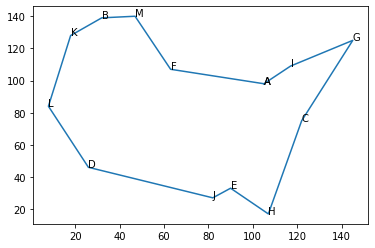

In [26]:
def get_random_string(length):
    letters = string.ascii_letters
    return ''.join(random.choice(letters) for i in range(length))

def main():
    # Random number of cities between 3 and 18 and the alphabets are the cities' names or you can use get_random_string fn for more but it will take too loong 
    N=random.randint(3, 18)
    graph = dict()
    alphabets=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
    # Random X and Y coordinates of cities
    first=''
    for i in range(N):
        city=alphabets[i]
        # city=get_random_string(8)
        if(i==0):
            first=city
        x= random.randint(0, 150)
        y= random.randint(0, 150)
        graph[city] = City(x, y)

    # S-mode is the way to switch between the three search algorithms
    # mode 1 = Best First Search
    # mode 2 = Uniform Cost Search
    # mode 3 = A* Search
    s_mode=3

    # H-mode is the way to switch between the three heuristic fns
    # mode 1 = Straight Line
    # mode 2 = MST heuristic
    # mode 3 = My heuristic fn - Next Minimum Distance
    h_mode=2

    #Calculating time to measure performance
    start_time = time.time()

    path, distance = executeSearch(N, graph, first,first, h_mode, s_mode)
    print('Number of cities: ' + str(N))
    print ('Final path: %s ' % (' -> '.join(path)))
    print ('Distance travelled: ' + str(int(distance)) + ' units')
    print ('Time taken: ' + str(time.time() - start_time) + " second(s)" )
    draw_route(graph, path)

main()